### **Sempre rode essa primeira célula antes de rodar qualquer outra**

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA_URL = r"C:\Users\gabri\Documents\PROJETOS\PY\PJ_Code\DE\Data\dados_limpos.csv"
df = pd.read_csv(DATA_URL)

In [68]:
df = df.dropna()

In [69]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop(columns=['customer_zip_code_prefix', 'seller_zip_code_prefix'])

In [70]:
#ajuste nome da coluna em [''] confome o dado a ser analisado
data = 'delivery_time'

#### Gráfico de coluna (x, y)

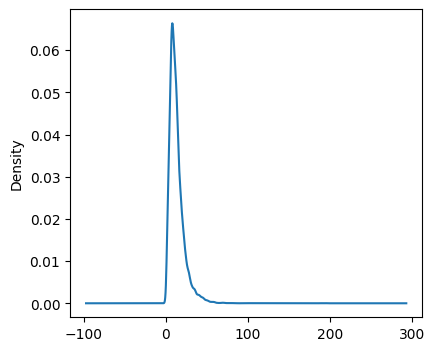

In [71]:
df[data].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

#adiciona limites ao eixo x, ajuste conforme necessidade
plt.xlim(0, 40) 
plt.show()

#### Grafico para mostrar faixa comum e outliers:

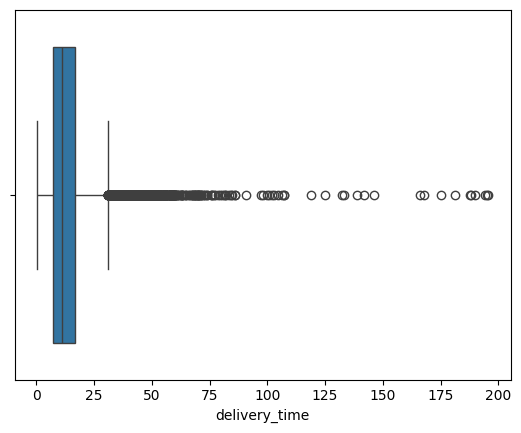

In [72]:
sns.boxplot(x=data, data=df)
plt.show()

#### Grafico de violino (ver distribuicao e outliers):

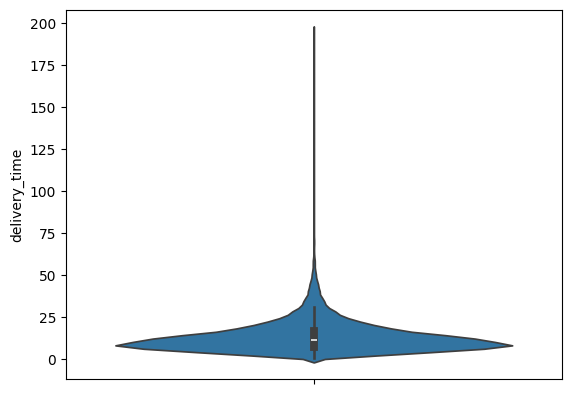

In [73]:
sns.violinplot(y= data, data=df)
plt.show()

#### Grafico de correlacao de variaveis (heatmap):

#### Correlacao de uma variavel com as outras (heatmaps):

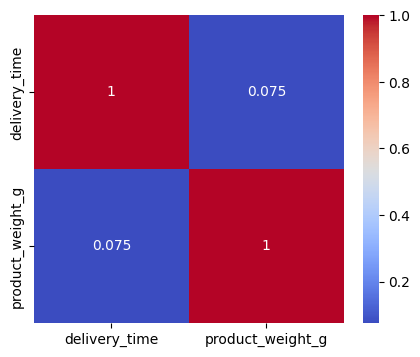

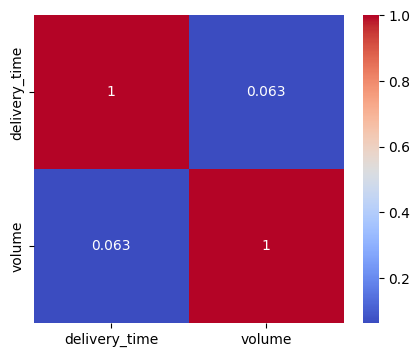

In [74]:
#adicione as variaveis a serem comparadas com a principal
variables_to_compare = ['product_weight_g', 'volume'] 

for variable in variables_to_compare:
    #troque delivery_time pela variavel que quer (PRINICIPAL)
    corr_matrix = df[['delivery_time', variable]].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

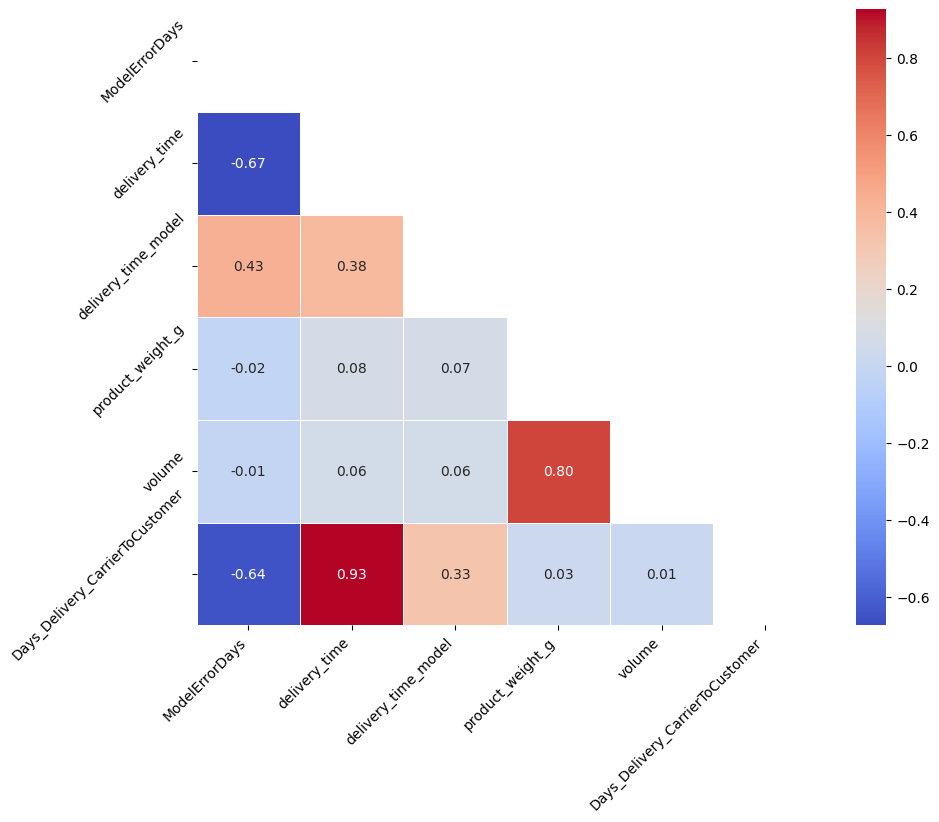

In [75]:
import numpy as np

plt.figure(figsize=(10, 8))

corr_matrix = df_num.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)

plt.show()

#### Grafico scatter (pontos):

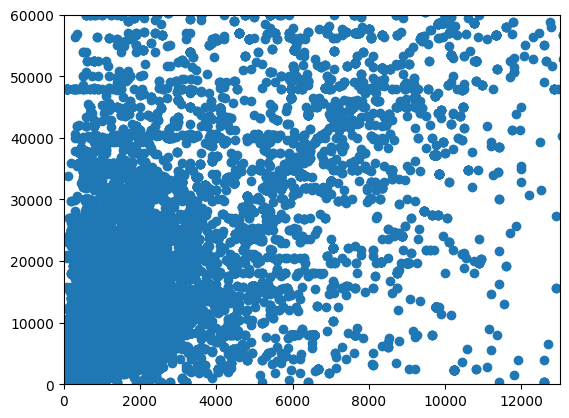

In [76]:
#coloque as duas variaveis a serem comparadas
plt.scatter(df['product_weight_g'], df['volume'])

#limites aos eixos x e y
plt.xlim(0, 13000) 
plt.ylim(0, 60000)
plt.show()

Mostrar diferenca por categoria

In [88]:

df = df.dropna(subset=['product_category_name'])

Q1 = df.groupby('product_category_name')['delivery_time'].quantile(0.25)
Q3 = df.groupby('product_category_name')['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

results = {}

for category in df['product_category_name'].dropna().unique():
    category_df = df[df['product_category_name'] == category]
    is_outlier = (category_df['delivery_time'] < lower_bound[category]) | (category_df['delivery_time'] > upper_bound[category])
    is_non_outlier = ~is_outlier
    
    outlier_count = is_outlier.sum()
    non_outlier_count = is_non_outlier.sum()
    
    non_outliers = category_df[is_non_outlier]
    non_outlier_range = (non_outliers['delivery_time'].min(), non_outliers['delivery_time'].max()) if not non_outliers.empty else (None, None)
    non_outlier_mean = non_outliers['delivery_time'].mean() if not non_outliers.empty else None
    
    results[category] = {
        'outlier_count': outlier_count,
        'non_outlier_count': non_outlier_count,
        'non_outlier_range': non_outlier_range,
        'non_outlier_mean': non_outlier_mean
    }

for category, info in results.items():
    print(f"{category}: MEDIA: {info['non_outlier_mean']}, Outliers: {info['outlier_count']}, Non-Outliers: {info['non_outlier_count']}, Non-Outlier Range: {info['non_outlier_range']}")

utilidades_domesticas: MEDIA: 10.786948948948949, Outliers: 80, Non-Outliers: 1665, Non-Outlier Range: (0.78, 27.97)
pet_shop: MEDIA: 11.348432539682541, Outliers: 22, Non-Outliers: 504, Non-Outlier Range: (1.26, 27.94)
papelaria: MEDIA: 12.22498044328553, Outliers: 33, Non-Outliers: 767, Non-Outlier Range: (1.44, 31.5)
automotivo: MEDIA: 11.764341216216216, Outliers: 67, Non-Outliers: 1184, Non-Outlier Range: (1.11, 31.54)
moveis_escritorio: MEDIA: 18.817467532467532, Outliers: 22, Non-Outliers: 462, Non-Outlier Range: (2.12, 40.83)
informatica_acessorios: MEDIA: 12.718896020539152, Outliers: 112, Non-Outliers: 2337, Non-Outlier Range: (1.0, 32.42)
telefonia: MEDIA: 12.395223780895124, Outliers: 59, Non-Outliers: 1497, Non-Outlier Range: (1.04, 31.59)
beleza_saude: MEDIA: 11.314026180087266, Outliers: 144, Non-Outliers: 2521, Non-Outlier Range: (1.05, 29.75)
eletronicos: MEDIA: 12.526313912009513, Outliers: 42, Non-Outliers: 841, Non-Outlier Range: (1.27, 30.52)
moveis_decoracao: MEDI

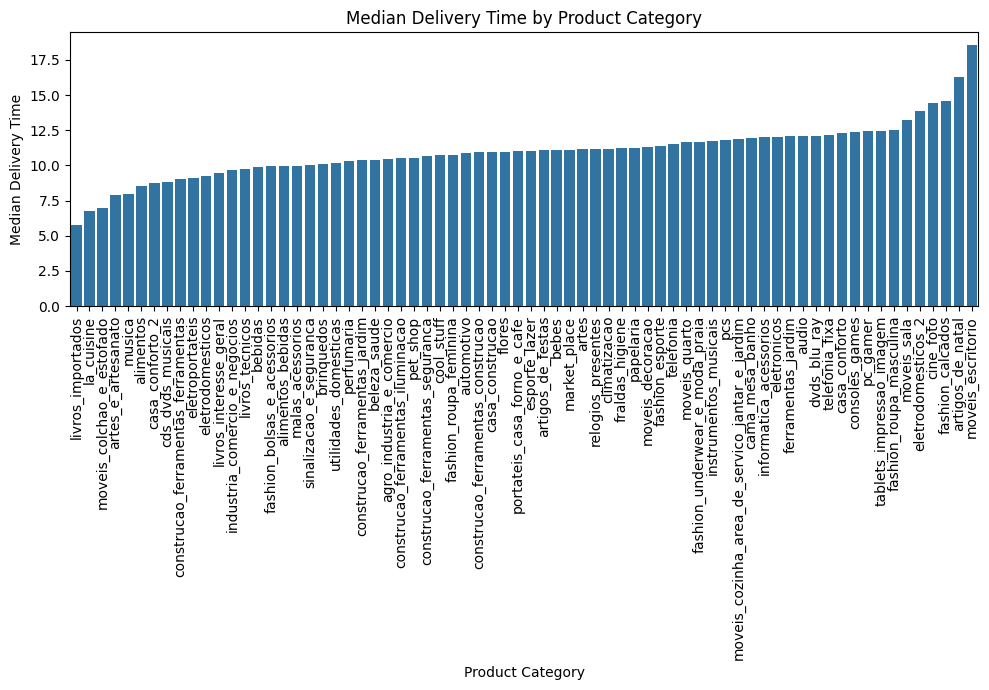

In [89]:


# Assuming df is your dataframe
df = df.dropna(subset=['product_category_name'])

# Calculate median delivery time for each category
median_delivery_time = df.groupby('product_category_name')['delivery_time'].median().sort_values()

# Plot median delivery times
plt.figure(figsize=(10, 7))
sns.barplot(x=median_delivery_time.index, y=median_delivery_time.values)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Median Delivery Time')
plt.title('Median Delivery Time by Product Category')
plt.tight_layout()
plt.show()

#### Mostrar base e outliers entre uma categoria e um numero:
Ex: delivery time por estado do cliente

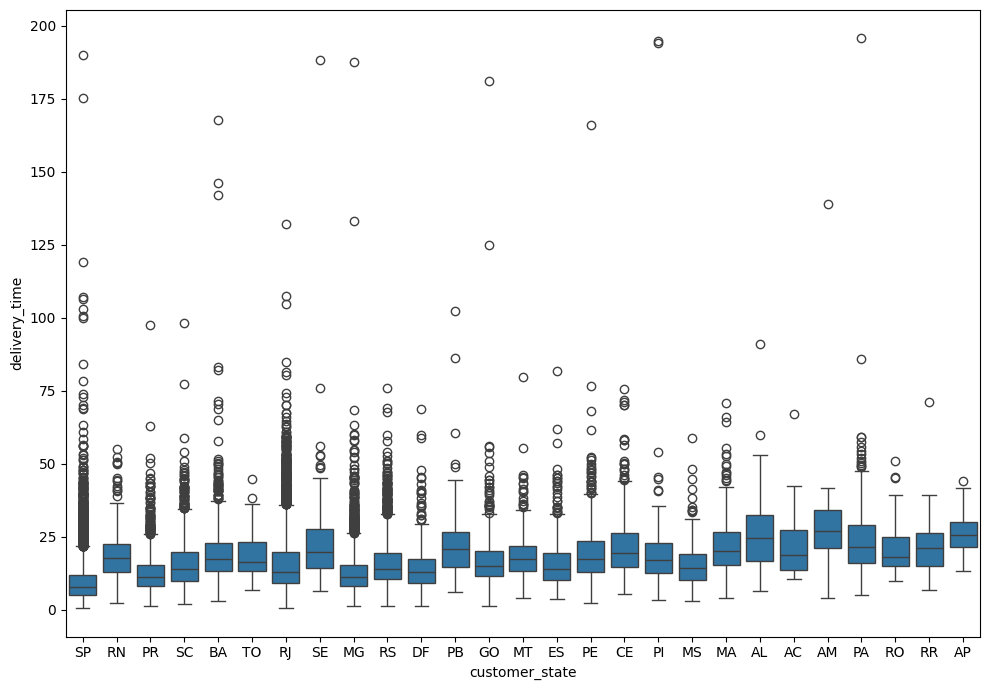

SP: Outliers: 584, Non-Outliers: 13154, Non-Outlier Range: (0.78, 21.68)


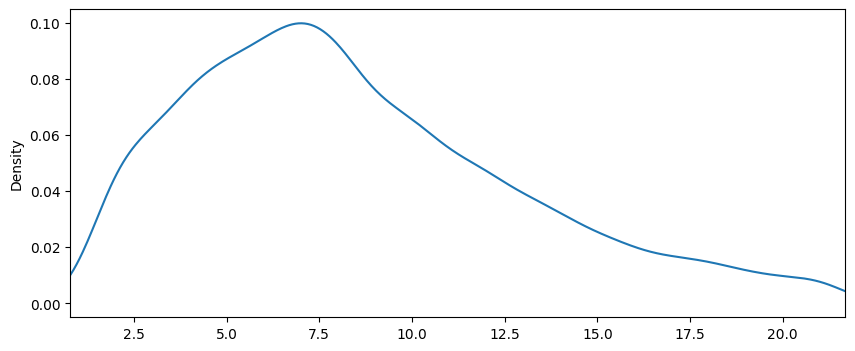

RN: Outliers: 13, Non-Outliers: 158, Non-Outlier Range: (2.4, 36.48)


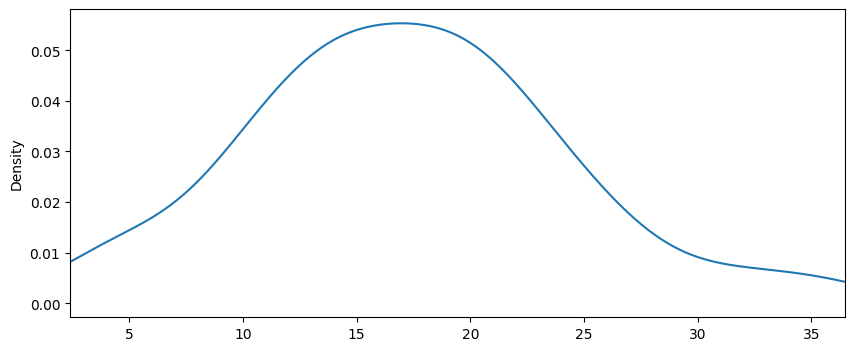

PR: Outliers: 77, Non-Outliers: 1681, Non-Outlier Range: (1.25, 25.89)


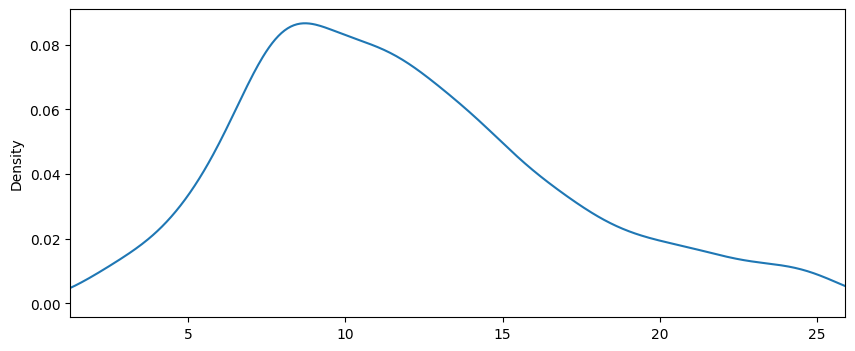

SC: Outliers: 58, Non-Outliers: 1203, Non-Outlier Range: (1.88, 34.56)


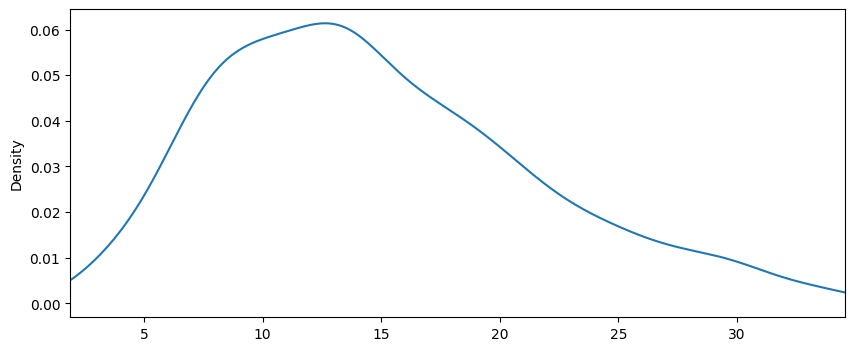

BA: Outliers: 50, Non-Outliers: 1028, Non-Outlier Range: (3.11, 37.26)


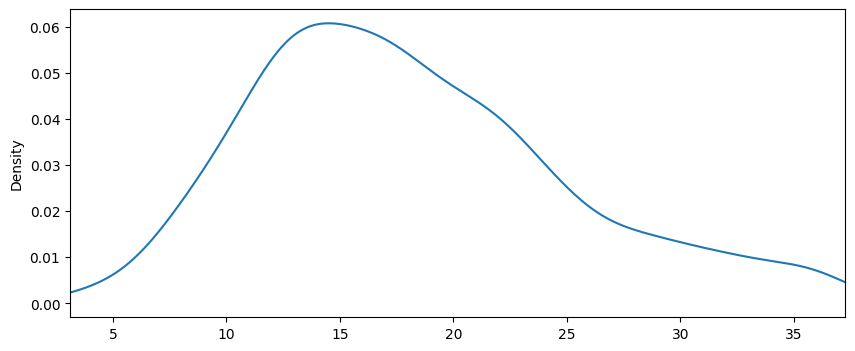

TO: Outliers: 2, Non-Outliers: 96, Non-Outlier Range: (6.89, 36.33)


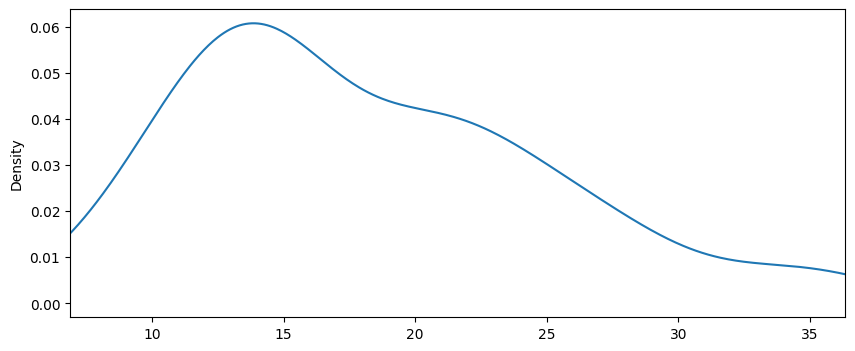

RJ: Outliers: 282, Non-Outliers: 4003, Non-Outlier Range: (0.53, 36.01)


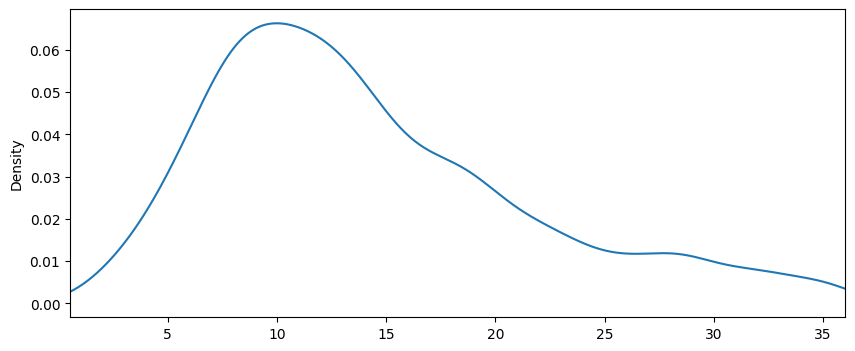

SE: Outliers: 8, Non-Outliers: 101, Non-Outlier Range: (6.34, 45.18)


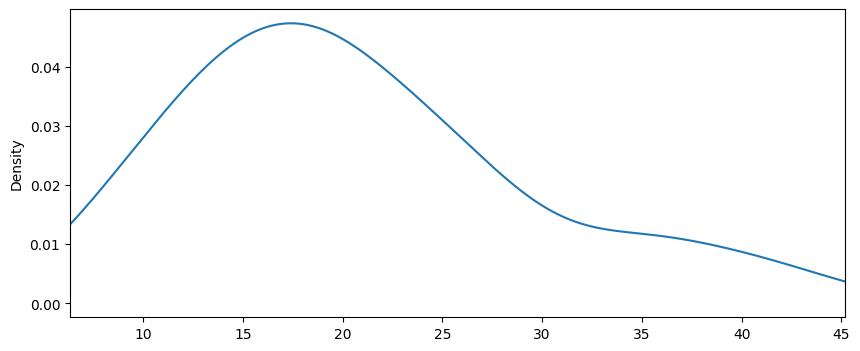

MG: Outliers: 188, Non-Outliers: 3806, Non-Outlier Range: (1.26, 26.28)


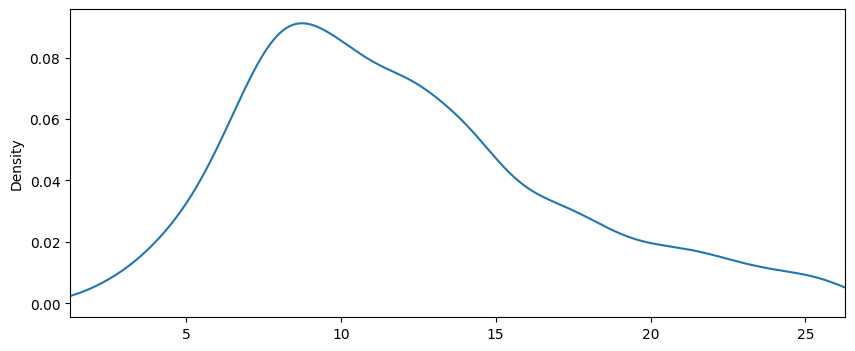

RS: Outliers: 107, Non-Outliers: 1840, Non-Outlier Range: (1.34, 32.83)


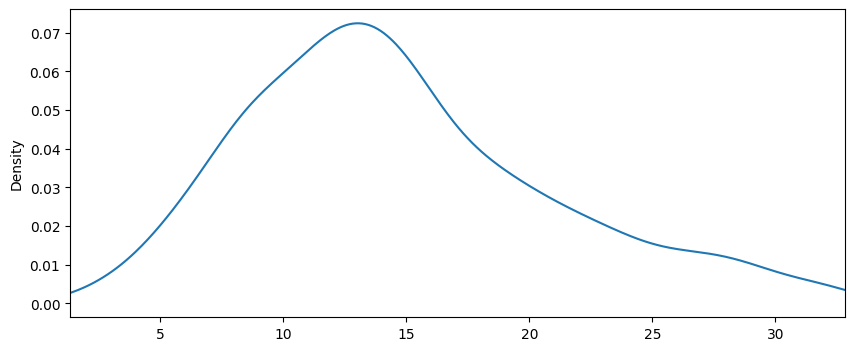

DF: Outliers: 22, Non-Outliers: 673, Non-Outlier Range: (1.27, 29.41)


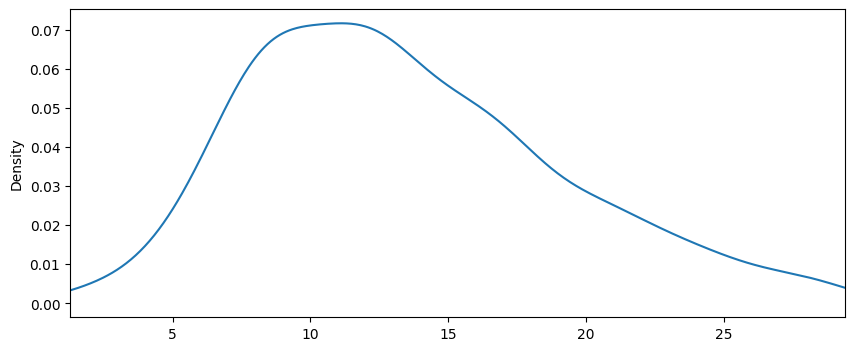

PB: Outliers: 5, Non-Outliers: 156, Non-Outlier Range: (6.08, 44.34)


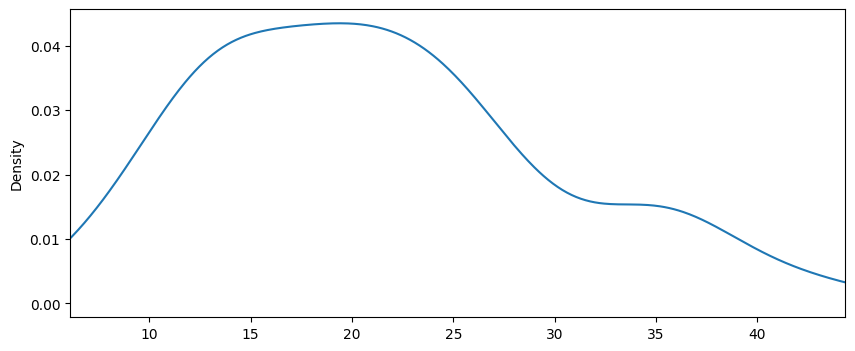

GO: Outliers: 28, Non-Outliers: 677, Non-Outlier Range: (1.26, 32.78)


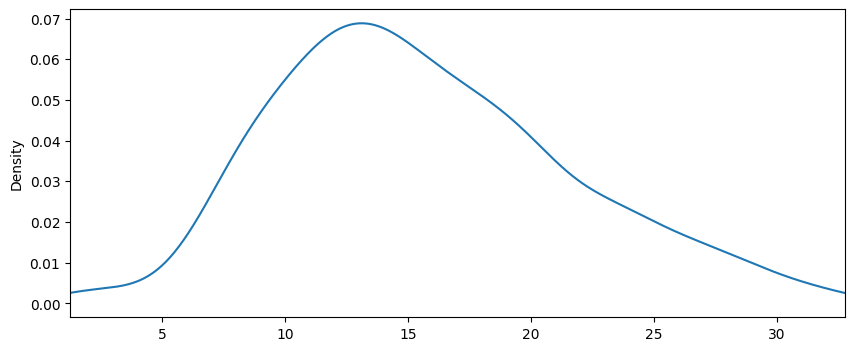

MT: Outliers: 16, Non-Outliers: 297, Non-Outlier Range: (3.92, 34.3)


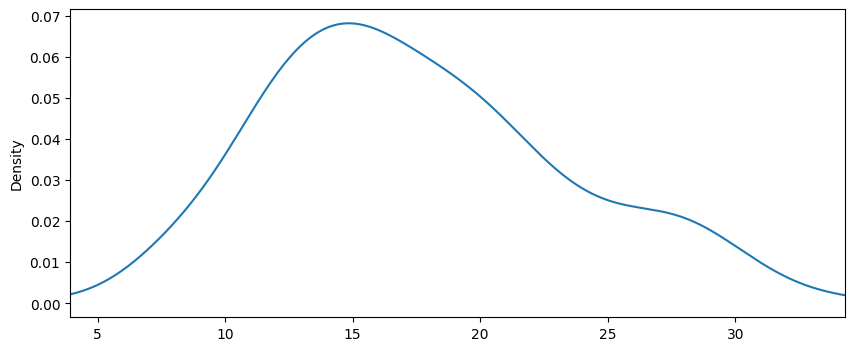

ES: Outliers: 26, Non-Outliers: 694, Non-Outlier Range: (3.56, 32.88)


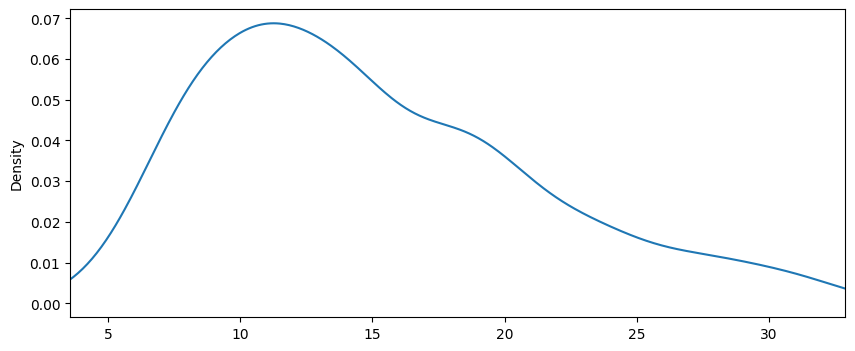

PE: Outliers: 27, Non-Outliers: 517, Non-Outlier Range: (2.47, 39.5)


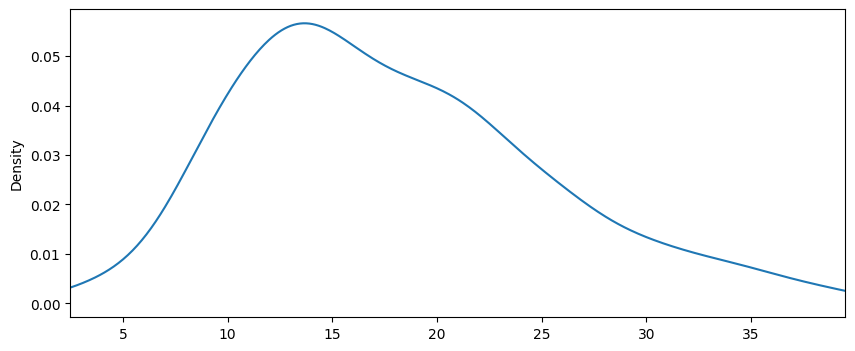

CE: Outliers: 21, Non-Outliers: 409, Non-Outlier Range: (5.33, 44.11)


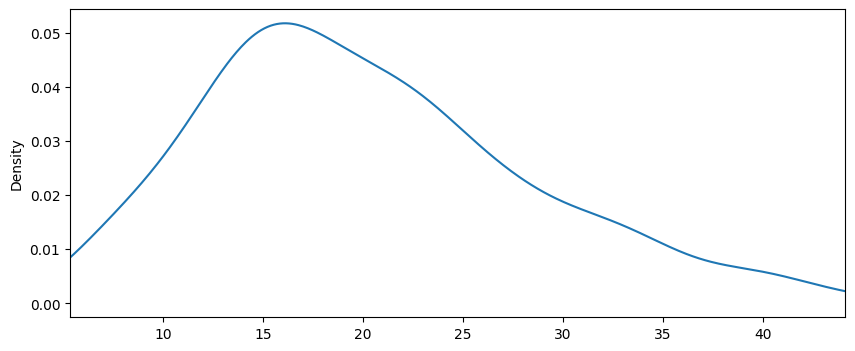

PI: Outliers: 7, Non-Outliers: 163, Non-Outlier Range: (3.27, 35.38)


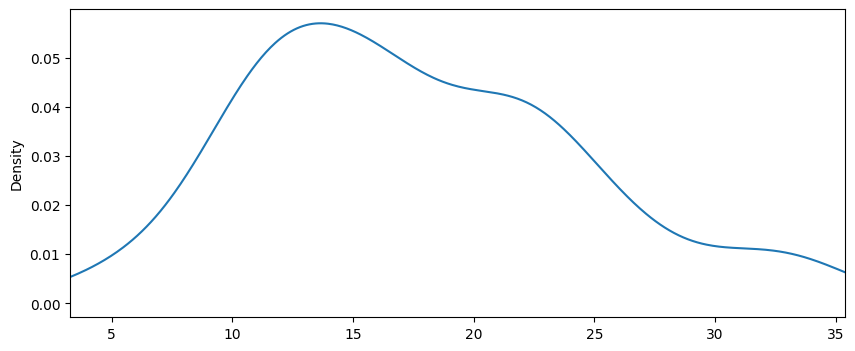

MS: Outliers: 10, Non-Outliers: 219, Non-Outlier Range: (3.04, 31.1)


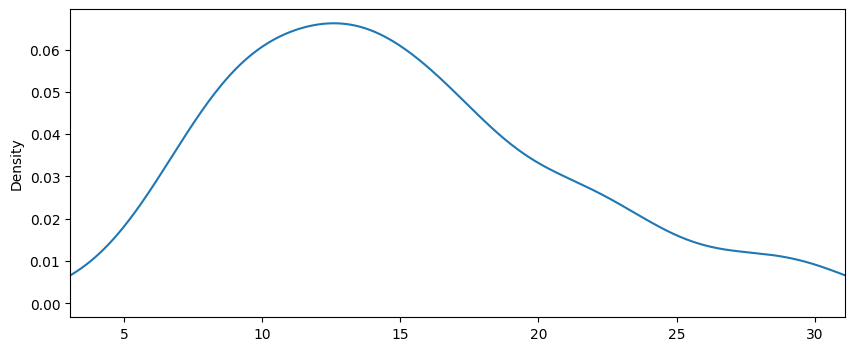

MA: Outliers: 14, Non-Outliers: 253, Non-Outlier Range: (4.17, 42.04)


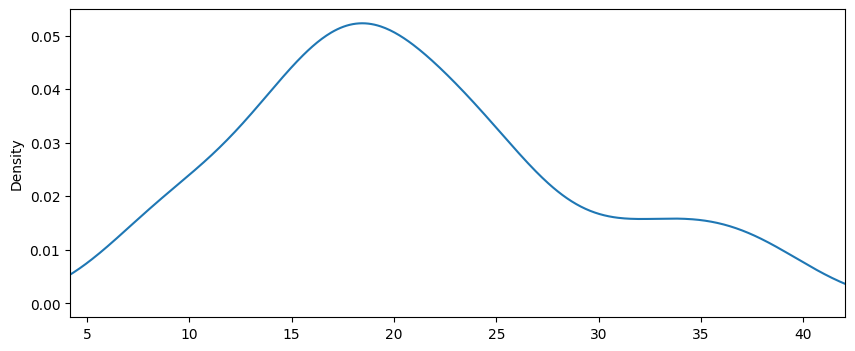

AL: Outliers: 2, Non-Outliers: 140, Non-Outlier Range: (6.57, 52.99)


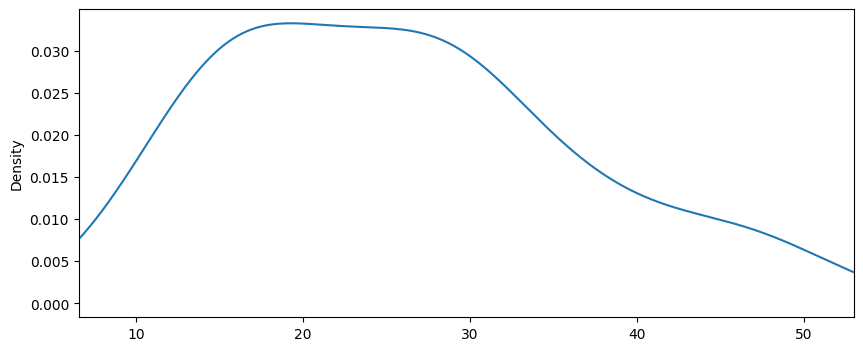

AC: Outliers: 1, Non-Outliers: 26, Non-Outlier Range: (10.46, 42.34)


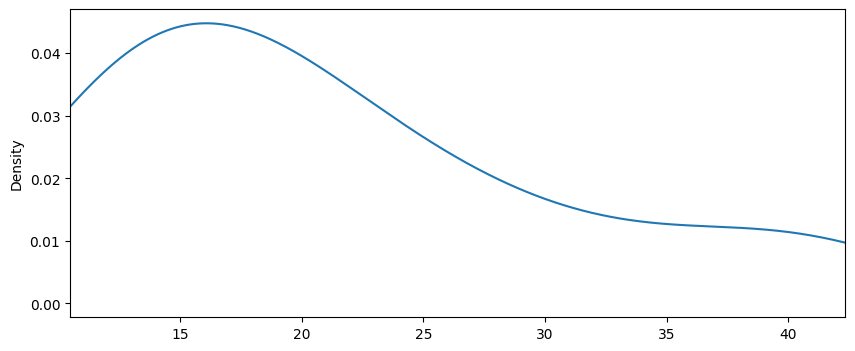

AM: Outliers: 1, Non-Outliers: 54, Non-Outlier Range: (4.12, 41.78)


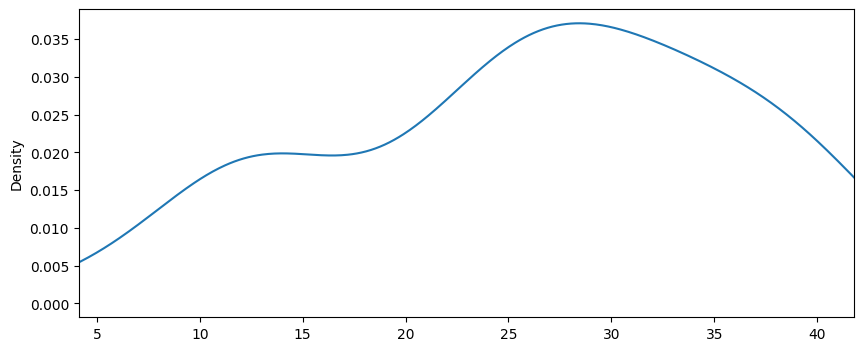

PA: Outliers: 14, Non-Outliers: 312, Non-Outlier Range: (5.02, 47.42)


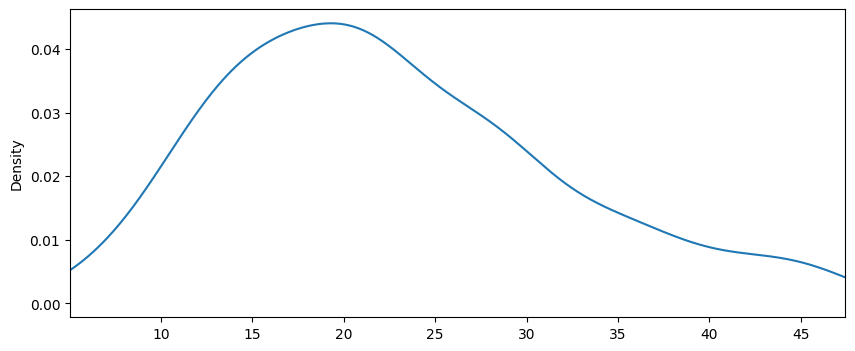

RO: Outliers: 3, Non-Outliers: 87, Non-Outlier Range: (10.02, 39.28)


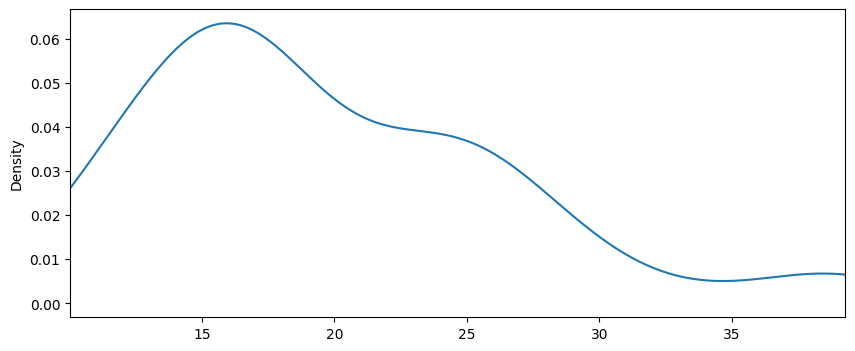

RR: Outliers: 1, Non-Outliers: 8, Non-Outlier Range: (6.74, 39.23)


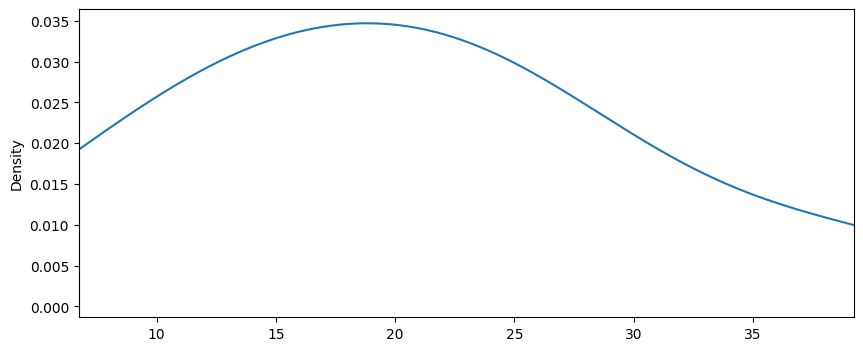

AP: Outliers: 1, Non-Outliers: 31, Non-Outlier Range: (13.37, 41.87)


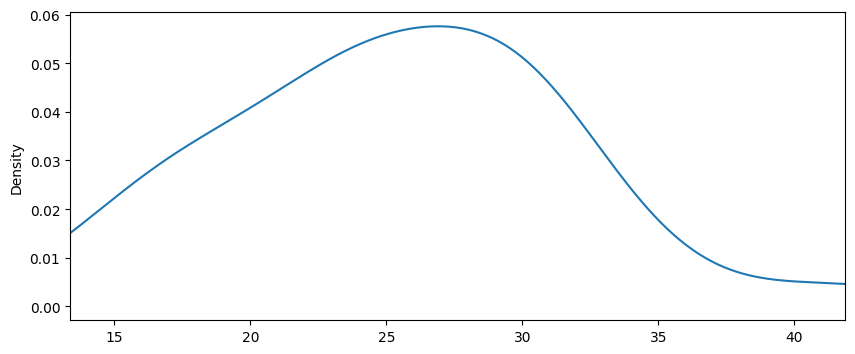

In [78]:
df = df.dropna(subset=['customer_state'])

plt.figure(figsize=(10, 7))
sns.boxplot(x='customer_state', y='delivery_time', data=df) #ajuste variaveis

plt.tight_layout()
plt.show()

Q1 = df.groupby('customer_state')['delivery_time'].quantile(0.25)
Q3 = df.groupby('customer_state')['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

results = {}

for state in df['customer_state'].dropna().unique():
    state_df = df[df['customer_state'] == state]
    is_outlier = (state_df['delivery_time'] < lower_bound[state]) | (state_df['delivery_time'] > upper_bound[state])
    is_non_outlier = ~is_outlier
    
    outlier_count = is_outlier.sum()
    non_outlier_count = is_non_outlier.sum()
    
    non_outliers = state_df[is_non_outlier]
    non_outlier_range = (non_outliers['delivery_time'].min(), non_outliers['delivery_time'].max()) if not non_outliers.empty else (None, None)
    
    results[state] = {
        'outlier_count': outlier_count,
        'non_outlier_count': non_outlier_count,
        'non_outlier_range': non_outlier_range
    }

for state, info in results.items():
    print(f"{state}: Outliers: {info['outlier_count']}, Non-Outliers: {info['non_outlier_count']}, Non-Outlier Range: {info['non_outlier_range']}")
    state_non_outliers = df[(df['customer_state'] == state) & (df['delivery_time'] >= info['non_outlier_range'][0]) & (df['delivery_time'] <= info['non_outlier_range'][1])]
    state_non_outliers['delivery_time'].plot(kind="density", figsize=(10, 4))
    plt.xlim(info['non_outlier_range'])
    plt.show()

#### Quantidade de correlacao com outras variaveis (dependencia)
>5 = alta dependencia

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
df_vim = df_num.drop(columns=['delivery_time_model', 'delivery_time', 'ModelErrorDays', 'Days_Delivery_CarrierToCustomer'])
vif_data["feature"] = df_vim.columns
vif_data["VIF"] = [variance_inflation_factor(df_vim.values, i) for i in range(len(df_vim.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

            feature      VIF
1            volume  3.66862
0  product_weight_g  3.66862


#### Ranking de importancia de variaveis

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(df_num, df['delivery_time'])

feature_ranking = zip(df_num.columns, rfe.ranking_)

sorted_feature_ranking = sorted(feature_ranking, key=lambda x: x[1])

print("Feature Ranking:")
for feature, rank in sorted_feature_ranking:
    print(f"{feature}: {rank}")

Feature Ranking:
delivery_time: 1
delivery_time_model: 2
ModelErrorDays: 3
product_weight_g: 4
volume: 5
Days_Delivery_CarrierToCustomer: 6


#### Modelagem baseada em eliminacao recursiva de features:
Modelando delivery time baseado em somente x variavel, teremos:
  
MSE: Quadrado do valor do erro medio  
R2: Quao relacionada esta a variacao de delivery time com a variacao dessa variavel   
(vai de 0 a 1, com 1 melhor)

In [81]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

y = df_num['delivery_time']

X_weight = df_num[['product_weight_g']]
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y, test_size=0.2, random_state=42)

model_weight = LinearRegression()
model_weight.fit(X_train_weight, y_train_weight)
predictions_weight = model_weight.predict(X_test_weight)

mse_weight = mean_squared_error(y_test_weight, predictions_weight)
r2_weight = r2_score(y_test_weight, predictions_weight)


X_volume = df_num[['volume']]
X_train_volume, X_test_volume, y_train_volume, y_test_volume = train_test_split(X_volume, y, test_size=0.2, random_state=42)

model_volume = LinearRegression()
model_volume.fit(X_train_volume, y_train_volume)
predictions_volume = model_volume.predict(X_test_volume)

mse_volume = mean_squared_error(y_test_volume, predictions_volume)
r2_volume = r2_score(y_test_volume, predictions_volume)

print("Performance with product_weight_g only:")
print(f"MSE: {mse_weight}")
print(f"R2: {r2_weight}\n")

print("Performance with volume only:")
print(f"MSE: {mse_volume}")
print(f"R2: {r2_volume}\n")


Performance with product_weight_g only:
MSE: 89.4394957596647
R2: 0.008222209875651365

Performance with volume only:
MSE: 89.4983545984418
R2: 0.00756953525404469



#### Grafico de importancia relativa (soma 1)

Como ambas tem baixa correlacao com target, considera-se apaga-las

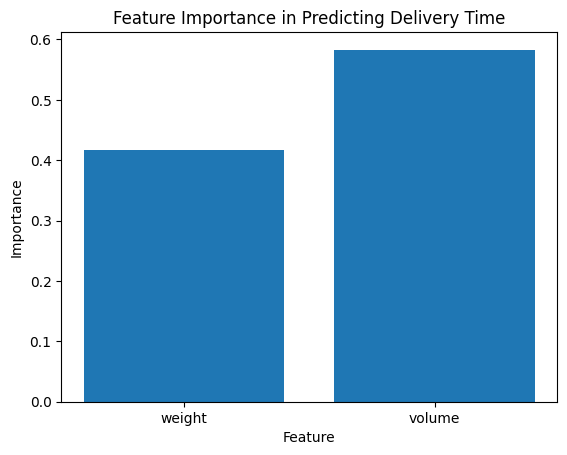

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset
# Replace 'weight', 'volume', and 'delivery_time' with the actual column names in your dataset
X = df[['product_weight_g', 'volume']]  # Features
y = df['delivery_time']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Getting the feature importances
importances = model.feature_importances_

# Visualizing the feature importances
features = ['weight', 'volume']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Delivery Time')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_18972\665354840.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T,


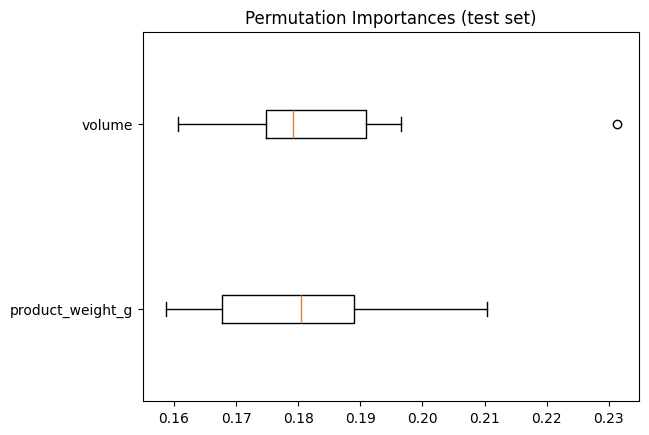

In [83]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10,
                          random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
          vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.show()

#### TESTAR MODELO E SEUS ERROS

In [84]:
from sklearn.metrics import mean_squared_error

# Fit model with both variables
model.fit(X[['product_weight_g', 'volume']], y)
pred_both = model.predict(X_test[['product_weight_g', 'volume']])
mse_both = mean_squared_error(y_test, pred_both)

# Fit model without 'weight'
model.fit(X[['volume']], y)
pred_volume_only = model.predict(X_test[['volume']])
mse_volume_only = mean_squared_error(y_test, pred_volume_only)

# Fit model without 'volume'
model.fit(X[['product_weight_g']], y)
pred_weight_only = model.predict(X_test[['product_weight_g']])
mse_weight_only = mean_squared_error(y_test, pred_weight_only)

print(f"MSE with both: {mse_both}")
print(f"MSE with volume only: {mse_volume_only}")
print(f"MSE with weight only: {mse_weight_only}")

MSE with both: 55.57392712229117
MSE with volume only: 75.80685734310498
MSE with weight only: 82.13220379683014


#### Treinamento e teste de modelo (com julgamento de variaveis):

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = df_num.drop(['delivery_time','ModelErrorDays'], axis=1) 
y = df_num['delivery_time'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.5)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coef = lasso.coef_
print("Lasso picked " + str(np.sum(coef != 0)) + " variables and eliminated the other " +
      str(np.sum(coef == 0)) + " variables")

for feature, coeff in zip(X.columns, coef):
    print(f"{feature}: {coeff}")

Mean Squared Error: 14.868609013860075
Lasso picked 4 variables and eliminated the other 0 variables
delivery_time_model: 0.09408341905681758
product_weight_g: 7.29506313988757e-05
volume: 9.15728240980769e-06
Days_Delivery_CarrierToCustomer: 0.9751387150917628
